The deadline for this homework is on **05.06.2022 23:49**. After completing the exercises, you should

1. Download this file into your computer (`File` $\to$ `Download .ipynb`)

2. Download the python files (`.py`) (*if there are any attached to the homework that you need to complete*). 

3. Compress the above files (`.zip` `.rar`) and name the compressed file in the following way *HWx_NameSurname* (for example `HW5_AnunAzganun.zip`)

4. Send the compressed file to this email address `fast.1991.ml@gmail.com` with subject **ML5**

**Note**

* if you do not follow any of the above conditions, your homework will not be graded.

* you do not need to send any dataset files or helper scripts that I provide with your homework (since I already have them).

* you need to write the code for the exercises yourself; you can use ``built-in functions``, ``numpy``, ``pandas``
and ``matplotlib``. Use of other libraries or packages (e.g., scikit-learn) will result in points deducted.

# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw5.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [3]:
cd drive/MyDrive/ML/Homework5/hw6

/content/drive/MyDrive/ML/Homework5/hw6


6. Run the below code snippet to import all the necessary libraries.

In [4]:
# from re import A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

plt.style.use('seaborn-whitegrid') # Plot style

%load_ext autoreload
%autoreload 2


# Linear Regression

The **linear** in *linear regression* does not meant that the resulting model predictions are linear in the raw features, instead they are linear in the estimated parameters (weights)! The modeler can still capture non-linearities using suitable transformations of the raw predictors (features)!

## Basis Expansion 

To capture non-linearities in regression models, we need to transform some or all of the predictors. To avoid having to treat every predictor as a special case needing detailed investigation, we would like some way of applying a very general family of transformations to our predictors. The family should be flexible enough to adapt (when the model is fit) to a wide variety of shapes, but not too flexible as to overfit before adapting itself to the shape of the signal being modeled.

This concept of a family of transformations that can fit together to capture general shapes is called a **basis expansion**. The word **basis** here is used in the linear algebraic sense: a linearly independent set of objects. In this case our objects are functions:
$$B = f_1, f_2, \ldots, f_k$$
and we create new sets of features by applying every function in our basis to a single raw feature:
$$f_1(x), \ f_2(x), \ \ldots, \ f_k(x)$$

## Polynomial Regression (Expansion)

In polynomial regression we choose as our basis a set of polynomial terms of increasing degree

$$f_1(x) = x, \ f_2(x) = x^2, \ \ldots, \ f_d(x) = x^d$$

## Simple Curve Fitting

We need to model the curve to be fit, $\hat{f}( x )$ , as a $d^{th}$ order polynomial on the data provided with ``x_train, y_train``. 

The mean-squared error objective function for curve fitting, in terms of $x_i$ , $y_i$ , and
$w_m$, in which $i$ is the data point index ( $i = 1,2, \ldots, N $), and $m$ is the weight
index ( $m = 0,1,\ldots,d$ ) is written below.

$$\mathbf{J}(w) = \sum_{i=1}^N (y_i-\sum_{j=0}^dw_j x_i^j)^2$$

In [5]:
def import_data(file_name):
  return pd.read_csv(file_name, header=None).values

In [6]:
x_train = import_data('x_train.csv')
y_train = import_data('y_train.csv')
x_test = import_data('x_test.csv')
y_test = import_data('y_test.csv')

(25, 1)

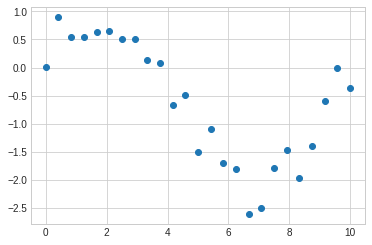

In [8]:
# Plot the data
plt.scatter(x_train, y_train);

The above objective function in matrix form in terms of $\Phi, y$, and $w$ . ( $\Phi$ is
the basis-set expansion version of $X$ ; the $i^{th}$ row is $\phi^T(x_i)$
) looks like this

$$\mathbf{J}=\|\mathbf{y}-\Phi \mathbf{w} \|$$

**Problem1.** Let the hypothesis set be polynomials in $x$ of degree [1, 2, 3, 7, 10]. Find the curve parameters (using only data from ``x_train`` and ``y_train``) for each of these polynomial degrees, using pseudo-inverse. Show the computed parameters (weight vectors)
$\boldsymbol{w}_1 , \boldsymbol{w}_2 , \boldsymbol{w}_3 , \boldsymbol{w}_7 , \boldsymbol{w}_{10}$ where $\boldsymbol{w}_d$ denotes the weight vector for the $d^{th}$ order
polynomial.


In [9]:
def fit_weights(x, y, d):
  """
  Returns the fitted weights of the polynomial regression
  of degree d
  :param x: nd array of size (nr_points, nr_features)
  :param y: nd array of size (nr_points, 1)
  :param d: int (>=1) of the polynomial degree 
  :returns: nd array of the weight vector (nr_features+1, )
  """
  phi = np.hstack([x**i for i in range(d+1)]) 
  return np.linalg.inv(phi.T @ phi) @ phi.T @ y
  # return np.linalg.pinv(phi) @ y

In [10]:
def get_predictions(x, w):
  """
  Applies the calculated weights on the sample data
  :param x: nd array of size (nr_points, nr_features)
  :param w: nd array of the weight vector (nr_features+1, )
  :returns: nd array of the predictions y
  """
  d = len(w)-1
  phi = np.hstack([x**i for i in range(d+1)])
  return  phi @ w

In [21]:
w1 = fit_weights(x_train, y_train, 1)
w2 = fit_weights(x_train, y_train, 2)
w3 = fit_weights(x_train, y_train, 3)
w7 = fit_weights(x_train, y_train, 7)
w10 = fit_weights(x_train, y_train, 10)

**Problem2.** Visualize how well each curve fits to the
training data on the same graph and make sure that your graph is readable (it has axis labels and a legend). 

In [22]:
_1 = get_predictions(x_train,w1)
_2 = get_predictions(x_train,w2)
_3 = get_predictions(x_train,w3)
_7 = get_predictions(x_train,w7)
_10 = get_predictions(x_train,w10)

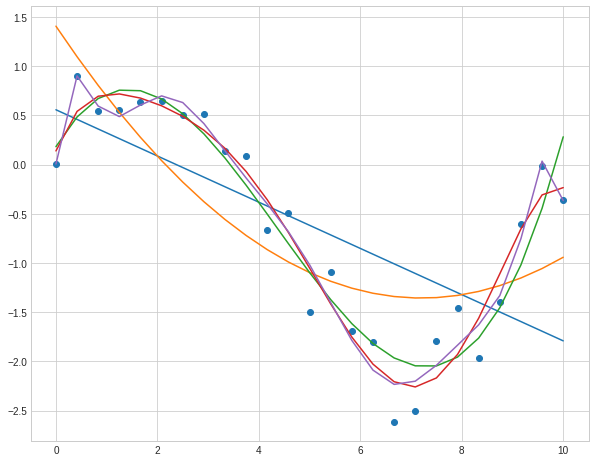

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(x_train, y_train)
plt.plot(x_train,_1)
plt.plot(x_train,_2)
plt.plot(x_train,_3)
plt.plot(x_train,_7)
plt.plot(x_train,_10)

plt.show()

**Question:** What pattern do you notice from the graph? Which polynomial would you choose based on the graph?

Բազմանդամի աստիճանի բարձրացման հետ արդյունքը գնալով լավանում է։ Լավագույն արդյունքը ստացել ենք 10-ի դեպքում, բայց որը շատ նման է overfit-ի, երևի 7-ը ավելի լավ ընտրություն է։

**Problem3.** Compute the MSE on the training set for each of the polynomials and plot the error vs polynomial degree in oder to decide which polynomial degree gives the best result on the training set. Make sure your graph has the appropriate labels on each axis.

In [24]:
def mse(y_true, y_predicted):
  y_true = np.array(y_true).flatten()
  y_predicted = np.array(y_predicted).flatten()
  return np.sum((y_true - y_predicted) ** 2)

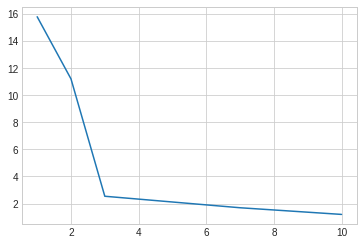

In [25]:
err, nums = [], [1,2,3,7,10]
for i in nums:
  cur_x = fit_weights(x_train, y_train, i)
  cur_y = get_predictions(x_train,cur_x)
  err.append(mse(y_train,cur_y))
plt.plot(nums,err)

plt.show()

**Question:** What do you notice about the MSE results for the different polynomials? Is your answer aligned with the graph in **Problem 2**?

Աստիճանի բարձրացման հետ միջին սխալանքը նվազում է։

**Problem4.** Using the same weights ( $\boldsymbol{w}_1 , \boldsymbol{w}_2 , \boldsymbol{w}_3 , \boldsymbol{w}_7 , \boldsymbol{w}_{10}$), compute the MSE for the test
samples, i.e., using ``x_test`` and ``y_test``. Plot the error vs. polynomial degree
again.

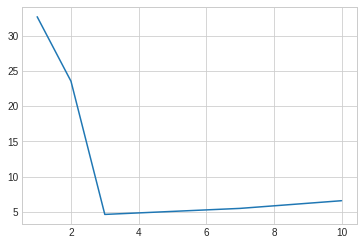

In [26]:
err = []
for i in nums:
  cur_x = fit_weights(x_train, y_train, i)
  cur_y = get_predictions(x_test,cur_x)
  err.append(mse(y_test,cur_y))


plt.plot(nums,err)
plt.show()

**Question:** Which polynomial degree seems to be the best model based on the test
sample MSE only?

Լավագույն արդյունքը ստացվում է 3-ի դեպքում։

**Problem5.** Now, let’s fix the polynomial degree to 7. Solve the problem using ridge regression with
penalty term $λ = [10^{−5} , 10^{−3} , 10^{−1} , 1, 10]$. Show the computed weights.

In [27]:
def fit_weights_ridge(x, y, d, lambda_):
  """
  Returns the fitted weights of the polynomial regression
  of degree d
  :param x: nd array of size (nr_points, nr_features)
  :param y: nd array of size (nr_points, 1)
  :param d: int (>=1) of the polynomial degree 
  :returns: nd array of the weight vector (nr_features+1, )
  
  """
  phi = np.hstack([x**i for i in range(d+1)]) 
  return np.linalg.inv(phi.T @ phi+ lambda_*np.eye(d+1)) @ phi.T @ y


In [38]:
w1 = fit_weights_ridge(x_train,y_train,7,0.00001)
w2 = fit_weights_ridge(x_train,y_train,7,0.001)
w3 = fit_weights_ridge(x_train,y_train,7,0.1)
w4 = fit_weights_ridge(x_train,y_train,7,1)
w5 = fit_weights_ridge(x_train,y_train,7,10)

**Problem6.** Compute ``train`` and ``test`` MSE of for the above ridge regression model and plot both MSEs vs  $\log(λ)$.


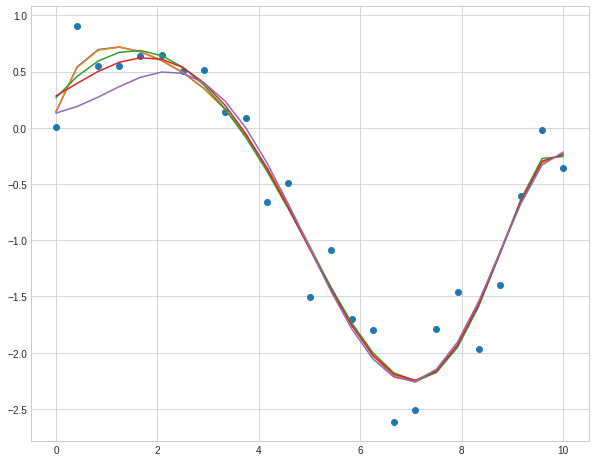

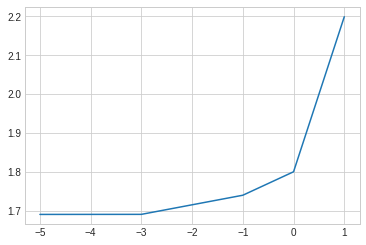

In [45]:
plt.figure(figsize=(10,8))

y1 = get_predictions(x_train,w1)
y2 = get_predictions(x_train,w2)
y3 = get_predictions(x_train,w3)
y4 = get_predictions(x_train,w4)
y5 = get_predictions(x_train,w5)

plt.scatter(x_train, y_train)
plt.plot(x_train,y1)
plt.plot(x_train,y2)
plt.plot(x_train,y3)
plt.plot(x_train,y4)
plt.plot(x_train,y5)
plt.show()

err = []
err.append(mse(y_train,y1))
err.append(mse(y_train,y2))
err.append(mse(y_train,y3))
err.append(mse(y_train,y4))
err.append(mse(y_train,y5))

lambd = [-5,-3,-1,0,1]
plt.plot(lambd,err)
plt.show()

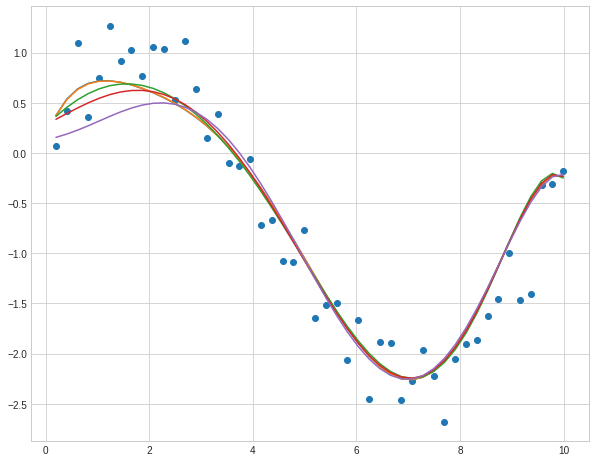

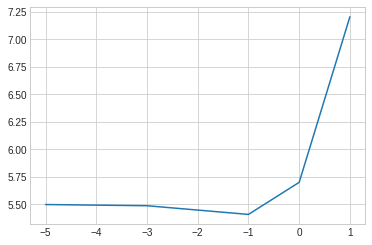

In [46]:
plt.figure(figsize=(10,8))

y1 = get_predictions(x_test,w1)
y2 = get_predictions(x_test,w2)
y3 = get_predictions(x_test,w3)
y4 = get_predictions(x_test,w4)
y5 = get_predictions(x_test,w5)

plt.scatter(x_test, y_test)
plt.plot(x_test,y1)
plt.plot(x_test,y2)
plt.plot(x_test,y3)
plt.plot(x_test,y4)
plt.plot(x_test,y5)
plt.show()

err = []
err.append(mse(y_test,y1))
err.append(mse(y_test,y2))
err.append(mse(y_test,y3))
err.append(mse(y_test,y4))
err.append(mse(y_test,y5))

lambd = [-5,-3,-1,0,1]
plt.plot(lambd,err)
plt.show()

**Question:** What are your conclusions?

train-ի և test-ի միջև տարբերությունը շատ չփոխվեց։

**Problem7.** Now that you have implemented most of the linear regression model, it's time to complete the ``LinearRegression`` class in ``regression_methods.py`` for performing the three different types of linear regression (Linear regression with OLS, Ridge and Lasso regression). We will test the performance of the models on another synthetic dataset.

In [47]:
data = pd.read_csv("data.csv", index_col = 0)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=['y']),
                                                    data['y'], test_size=0.3,
                                                    random_state=0)

In [49]:
from regression_methods import LinearRegression as MyLinearRegression

In [84]:
model = MyLinearRegression()
model.fit(X_train, Y_train)
pred_l0 = model.predict(X_test)
your_mse = mse(pred_l0, Y_test)
print('MSE of your implementation', your_mse)

MSE of your implementation 80.67030379147809


Let's compare with the sklearn's implementation. If the below code does not result in an error, then your implementation is correct.

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
sklearn_mse = mse(pred, Y_test)
print('MSE of sklearn implementation', sklearn_mse)
assert np.round(your_mse, 2) == np.round(sklearn_mse, 2)

MSE of sklearn implementation 80.6703037914803


Run the below code to test the Ridge regression implementation. You should get about 74.8 MSE on test set.

In [85]:
model = MyLinearRegression(regularization='l2', lam=0.2)
model.fit(X_train, Y_train)
pred_l2 = model.predict(X_test)
print('Ridge MSE on train:', mse(model.predict(X_train), Y_train))
print('Ridge MSE on test:', mse(pred_l2, Y_test))

Ridge MSE on train: 28.95439881295583
Ridge MSE on test: 123.54047147592806


Run the below code to test the Lasso regression implementation. You should get about 64 MSE.

In [86]:
np.random.seed(4)
model = MyLinearRegression(regularization='l1', lam=0.2,
                           learning_rate=0.001, tol=0.005)
model.fit(X_train, Y_train)
pred_l1 = model.predict(X_test)
print('Lasso MSE on train:', mse(model.predict(X_train), Y_train))
print('Lasso MSE on test:', mse(pred_l1, Y_test))

Converged in 369 steps
Lasso MSE on train: 13.823899447647635
Lasso MSE on test: 69.47258273961296


# Regression Trees

**Problem8.** Complete the ``RegressionTree`` class in ``regression_methods.py`` script and test its implementation below, you should get about 6426 MSE on test set.

In [54]:
from regression_methods import RegressionTree
model = RegressionTree()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print('Regression tree mse on train:', mse(model.predict(X_train), Y_train))
print('Regression tree mse on test:', mse(pred, Y_test))

Regression tree mse on train: 0.0
Regression tree mse on test: 6146.092642225584


**Question:** Do you notice anything strange? Comment on the difference between train and test MSEs.

Պարզ երևում է որ overfit է եղել։

**Problem9.** Apply the regression tree on the first dataset of this homework and visualize the predictions along with the true values of the train set and then on the test set. Also report the MSEs for both cases.

In [93]:
model = RegressionTree()
model.fit(x_train, y_train)
pred = model.predict(x_train)
print('Regression tree mse on train:', mse(pred, y_train))

Regression tree mse on train: 0.0


In [94]:
pred = model.predict(x_test)
print('Regression tree mse on train:', mse(pred, y_test))


Regression tree mse on train: 8.563355951964407


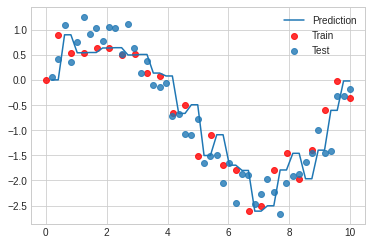

In [95]:
plt.scatter(x_train,y_train,color ='r',label='Train',alpha=0.8)
plt.scatter(x_test,y_test,label='Test',alpha=0.8)
plt.plot(x_test,pred,label='Prediction')

plt.legend();

**Question:** What do you notice in case of regression trees on this dataset? Do you get better results than with the linear models?

Գծային և քառակուսային մոդելներից ավելի լավ արդյունք է ստացվել։